## Titanic: Machine Learning From Disaster

In [1]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Classification Tools

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Workflow stages

#### 1. Question or problem definition.
#### 2. Acquire training and testing data.
#### 3. Wrangle, prepare, cleanse the data.
#### 4. Analyze, identify patterns, and explore the data.
#### 5. Model, predict and solve the problem.
#### 6. Visualize, report, and present the problem solving steps and final solution.
#### 7. Supply or submit the results.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

## 1. Question/Problem Definition:

### Can we use the training data to build a model which predicts if a passenger survives?

#### Problem Assumptions:
##### -The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  (1 - 1502/2224 = 32% survival rate)
##### - Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## 2. Acquire training and testing data.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combined_df = [train_df, test_df]

## 4. Analyze, identify patterns, and explore data

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Mean of 'Survived' is ~38%, which is close to the problem defined assumption.  We'll proceed as if this sample is representative of the total population

In [4]:
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 7 'C's for Data Science Workflow to help with wrangling, analysis, and modeling.

### Classifying 
*We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.*

**Classifying our assumptions:**<br>
1. Women (sex=female) were more likely to survive.<br>
2. Children (age<?) were more likely to survive.<br>
3. The upper-class passengers (Pclass=1) were more likely to survive.<br>

### Correlating 
*One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.*

** We want to find how each feature correllates with our target 'Survived'

### Converting 
*For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.*


### Completing 
*Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.*

1. Age feature in both train and test are missing values
2. Fare feature in test is missing values
3. Embarked feature in train is missing values.

### Correcting. 
*We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.*

1. Explore Fare=0.0 situation, correct as necessary
2. Remove Cabin feature as it contains high number of null entries in both train and test.
3. remove Ticket feature as the ticket number likely doesn't correlate to survival.
4. remove PassengerID feature as it doesn't correlate to survival.
5. Name feature is non-standard, so it may be removed.

### Creating. 
*Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.*

1. Engineer Title feature from Name feature, standardizing and categorizing it.
2. Engineer Family feature from Parch feature, for correlation between being in a family and survival.
3. Create Age bands to convert continuous ages into ordinal feature.
4. Create Fare bands to convert continuous fares into ordinal feature.

### Charting. 
*How to select the right visualization plots and charts depending on nature of the data and the solution goals.*

## Pivot features against each each other to look for correlation.

### Classifying Assumptions

**Women (sex=female) were more likely to survive.**

In [6]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**The upper-class passengers (Pclass=1) were more likely to survive.**

In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Can we do this with other features?

In [8]:
for col_name in train_df.drop(['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1).columns:
    print(train_df[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().sort_values(by='Survived', ascending=False))
    print('-' * 40)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------------
      Age  Survived
0    0.42  1.000000
9    5.00  1.000000
79  63.00  1.000000
68  53.00  1.000000
1    0.67  1.000000
17  13.00  1.000000
16  12.00  1.000000
87  80.00  1.000000
2    0.75  1.000000
4    0.92  1.000000
3    0.83  1.000000
7    3.00  0.833333
20  15.00  0.800000
5    1.00  0.714286
8    4.00  0.700000
10   6.00  0.666667
63  48.00  0.666667
64  49.00  0.666667
47  35.00  0.611111
35  27.00  0.611111
74  58.00  0.600000
31  24.00  0.500000
65  50.00  0.500000
70  55.00  0.500000
72  56.00  0.500000
76  60.00  0.500000
78  62.00  0.500000
43  32.50  0.500000
42  32.00  0.500000
67  52.00  0.500000
..    ...       ...
13   9.00  0.250000
15  11.00  0.250000
27  21.00  0.208333
25  20.00  0.200000
57  43.00  0.200000
50  37.00  0.166667
62  47.00  0.11111

**Clearly some of these are more useful than others.  In addition to Pclass and Sex, we see correlation between Embarked and Survived, partial correlation between Parch/SibSp and Survived, and possible correlation amongst some ages/fares and Survived.  The features with partial/possible correlation could potentially be banded together.**

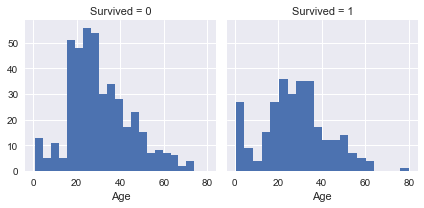

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations.**

**Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.
Decisions.**

**This simple analysis confirms our assumptions as decisions for subsequent workflow stages.**

**We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).**

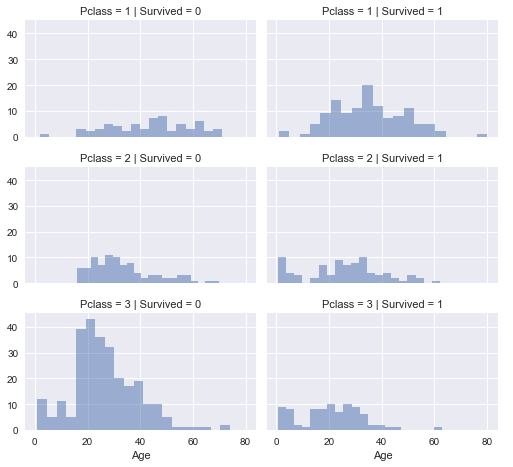

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**

**Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.**

**Decisions.**

**Consider Pclass for model training.**

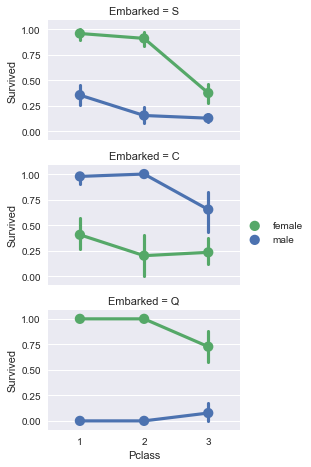

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**

**Female passengers had much better survival rate than males. Confirms classifying (#1).
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).**

**Decisions.**

**Add Sex feature to model training.
Complete and add Embarked feature to model training.**

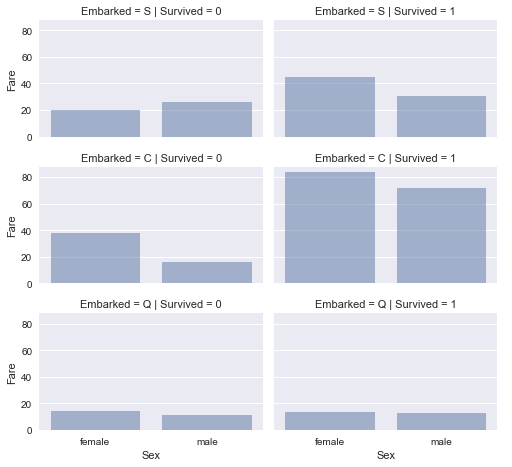

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations.**

**Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).**

**Decisions.**

**Consider banding Fare feature.**

### Wrangling data

#### Correcting by dropping features
**This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.**

**Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.**

**Note that where applicable we perform operations on both training and testing datasets together to stay consistent.**

In [18]:
print("Before", train_df.shape, test_df.shape, combined_df[0].shape, combined_df[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

We decide to retain the new Title feature for model training.

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
